In [31]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

In [32]:
# Training a multi layer percetro for data with two classes
data = np.loadtxt(r'\Users\alana\Documents\TecMTY\RoboticaInteligente\DeepLearning\red_neronal\mist_data\misterious_data_1.txt')
x = data[:,1:]
y = data[:,0]

# Train MLP classifier with all available observations
clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000)
clf.fit(x, y)

# Applying cross validation
kf = KFold(n_splits=5, shuffle = True)

acc = 0
for train_index, test_index in kf.split(x):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_i = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000)
    clf_i.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]    
    y_pred = clf_i.predict(x_test)

    # Calculate confusion matrix and model performance
    cm = confusion_matrix(y_test, y_pred)
    acc_i = (cm[0,0]+cm[1,1])/len(y_test)    
    print('acc = ', acc_i)

    acc += acc_i 

acc = acc/5
print('ACC = ', acc)

acc =  0.839622641509434
acc =  0.7547169811320755
acc =  0.7641509433962265
acc =  0.780952380952381
acc =  0.7714285714285715
ACC =  0.7821743036837376


In [33]:
# Training a multi perceptron using data with four classes
data_two = np.loadtxt(r'\Users\alana\Documents\TecMTY\RoboticaInteligente\DeepLearning\red_neronal\mist_data\misterious_data_4.txt')
x = data[:,1:]
y = data[:,0]

# Train MLP classifier with all available observations
clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000)
clf.fit(x, y)

# Applying cross validation
kf = KFold(n_splits=5, shuffle = True)

acc = 0
for train_index, test_index in kf.split(x):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_i = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000)
    clf_i.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]    
    y_pred = clf_i.predict(x_test)

    # Calculate confusion matrix and model performance
    cm = confusion_matrix(y_test, y_pred)
    acc_i = np.trace(cm) / np.sum(cm)   
    print('acc = ', acc_i)

    acc += acc_i 

acc = acc/5
print('ACC = ', acc)

acc =  0.8018867924528302
acc =  0.7452830188679245
acc =  0.7547169811320755
acc =  0.780952380952381
acc =  0.8666666666666667
ACC =  0.7899011680143755


-----------Variable 0
MSE:  5774.84160078541
R^2:  0.02614608863753054


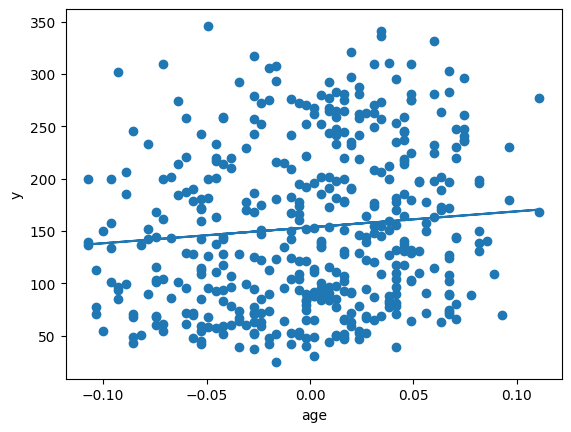

-----------Variable 1
MSE:  5921.806962196358
R^2:  0.001362241401723252


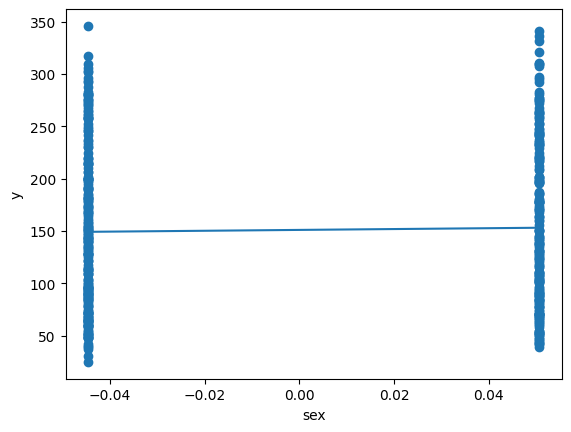

-----------Variable 2
MSE:  3905.0458736299124
R^2:  0.34146346151431406


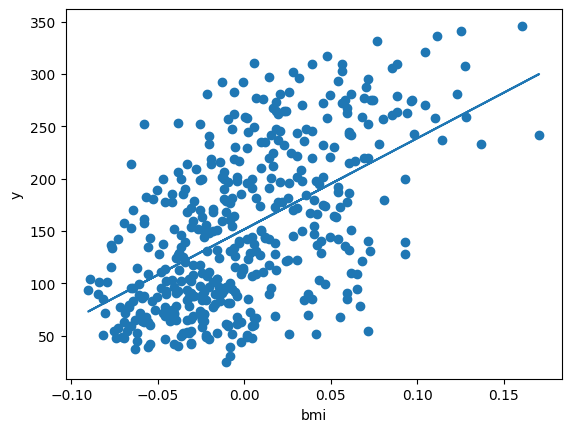

-----------Variable 3
MSE:  4803.122862353777
R^2:  0.1900141493713775


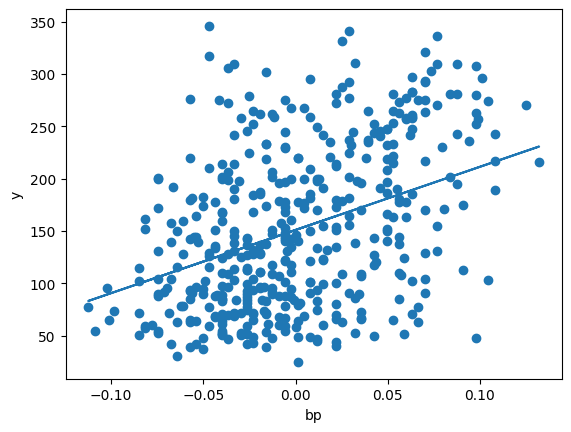

-----------Variable 4
MSE:  5699.285444668088
R^2:  0.03888767762801659


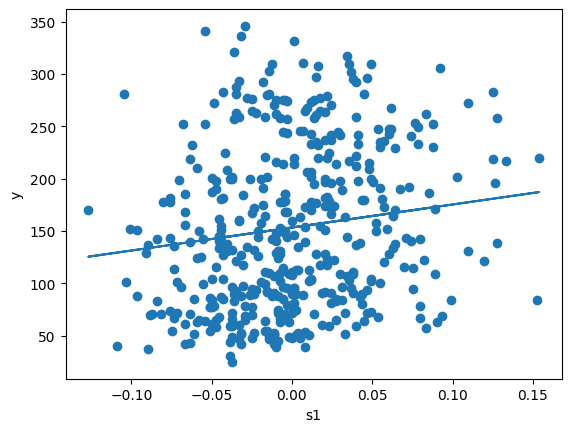

-----------Variable 5
MSE:  5769.383606083058
R^2:  0.02706651033158336


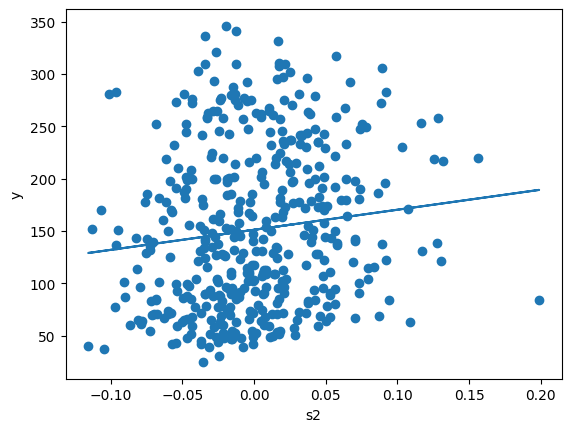

-----------Variable 6
MSE:  5028.03441416595
R^2:  0.15208566412719404


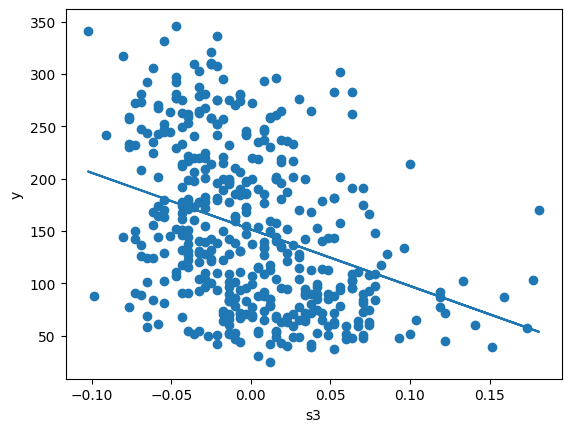

-----------Variable 7
MSE:  4853.602968245874
R^2:  0.18150131872294484


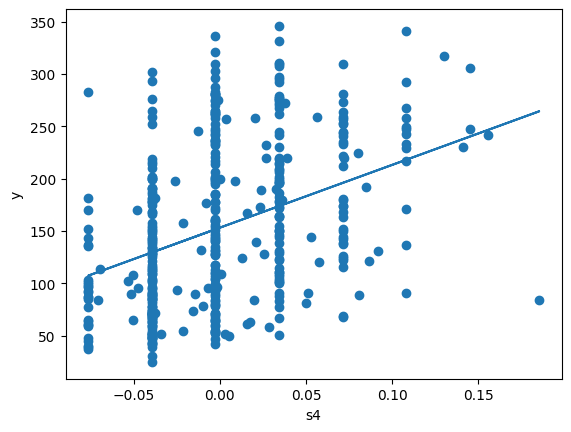

-----------Variable 8
MSE:  4072.9932113941654
R^2:  0.3131412696532616


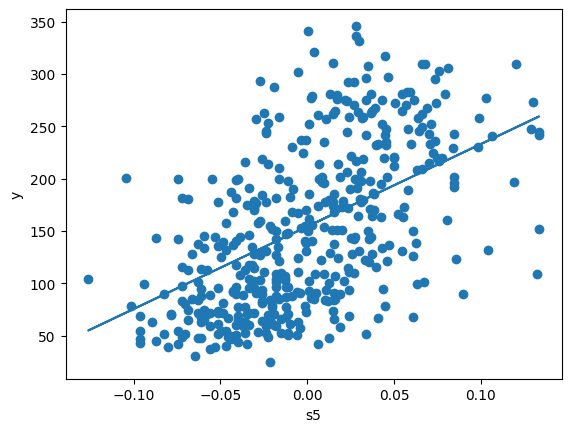

-----------Variable 9
MSE:  5088.798823750043
R^2:  0.14183851588730956


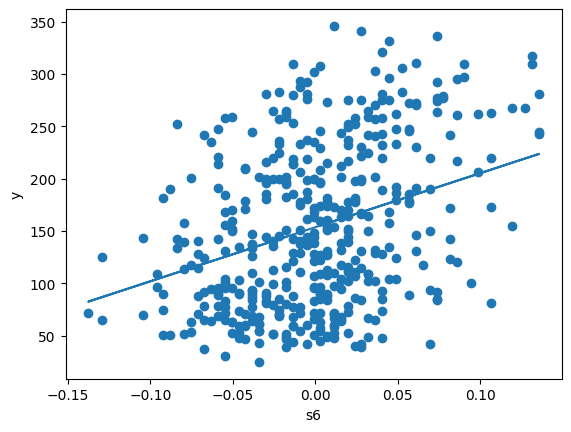

Average MSE:  5091.691576727264
Average R^2:  0.14135068972752554


In [34]:
# Using diabetes dataset to evaluate in a multilayer perceptron

#Loading data and checking it
diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target
features = diabetes.feature_names
n_features = len(features)

# Entrenando el regresor MLP
regressor = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=10000)
regressor.fit(x, y)

# Aplicando validacion cruzada
kf = KFold(n_splits=5, shuffle=True)

mse = 0
r2 = 0

# Train MLP regressor for one variable
for var in range(n_features):
    print('-----------Variable', var)

    regressor_i = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=10000)
    regressor_i.fit(x[:, var].reshape(-1, 1), y)

    y_pred = regressor_i.predict(x[:, var].reshape(-1, 1))
    mse_i = mean_squared_error(y, y_pred)
    r2_i = r2_score(y, y_pred)

    mse += mse_i
    r2 += r2_i

    print('MSE: ', mse_i)
    print('R^2: ', r2_i)

    plt.scatter(x[:, var], y)
    plt.plot(x[:, var], y_pred)
    plt.xlabel(features[var])
    plt.ylabel('y')
    plt.show()

mse /= n_features
r2 /= n_features

print('Average MSE: ', mse)
print('Average R^2: ', r2)

In [35]:
# Import IRIS data set
diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target

features = diabetes.feature_names
n_features = len(features)

# Create output variables from original labels. This is required only in multiclass problems.
output_y = np_utils.to_categorical(y)   
print(output_y)

# Define MLP model
clf = Sequential()
clf.add(Dense(10, input_dim=x.shape[1], activation='relu'))
clf.add(Dense(10, activation='relu'))
clf.add(Dense(1, activation='linear')) # for 2-class problems, use clf.add(Dense(1, activation='sigmoid'))

# Compile model
clf.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
 
# Fit model
clf.fit(x, output_y, epochs=150, batch_size=5)

# Evaluate model
kf = KFold(n_splits=5, shuffle = True)

mse = 0

for train_index, test_index in kf.split(x):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_cv = Sequential()
    clf_cv.add(Dense(10, input_dim=n_features, activation='relu'))
    clf_cv.add(Dense(10, activation='relu'))
    clf_cv.add(Dense(1, activation='linear'))
    clf_cv.compile(loss='mean_squared_error', optimizer='adam') 
    clf_cv.fit(x_train, y_train, epochs=150, batch_size=5, verbose=0)    

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)

    mse += ((y_test - y_pred) ** 2).mean()

mse /= 5
print('MSE = ', mse)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 1/150
89/89 [==============================] - 1s 1ms/step - loss: 0.0029 - accuracy: 0.9971
Epoch 2/150
89/89 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 0.9971
Epoch 3/150
89/89 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 0.9971
Epoch 4/150
89/89 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.9971
Epoch 5/150
89/89 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 0.9971
Epoch 6/150
89/89 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 0.9971
Epoch 7/150
89/89 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.9971
Epoch 8/150
89/89 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 0.9971
Epoch 9/150
89/89 [==============================] -